# Exploring **Registered Community Organizations (RCO) Boundaries**
## Data Description
Registered Community Organization Boundaries in Philadelphia, PA

Source: [RCO Boundaries Open Philly Data](https://www.opendataphilly.org/dataset/registered-community-organizations)  

*Here I can see all of the RCOs in Philadelphia, their contact information, address, type, preferred method of communication, and location, among other information. First, I'll explore columns and value counts that might be helpful to my final project. Then I'll practice plotting, trim the data, and finally map the orgs, which is the most important to me because it will allow me to see which orgs are near my project area and will be worth looking into and potentially reaching out to.*  

## *Importing Modules and Data* 

In [92]:
import pandas as pd 
import geopandas as gpd

I'll read and add a shapefile to my notebook

In [20]:
RCO = gpd.read_file('Zoning_RCO.zip')

Checking to see that this is the right type of data

In [21]:
type(RCO)

geopandas.geodataframe.GeoDataFrame

Let's preview the dataframe

In [46]:
RCO.head(10)

,OBJECTID,ORGANIZATI,ORGANIZA_1,MEETING_LO,ORG_TYPE,PREFFERED_,PRIMARY_NA,PRIMARY_AD,PRIMARY_EM,PRIMARY_PH,...,ALTERNAT_1,ALTERNAT_2,ALTERNAT_3,A_PHONE_EX,EXPIRATION,EFFECTIVE_,LNI_ID,Shape__Are,Shape__Len,geometry
0,1,Girard Estate Neighbors Association,"PO Box 20116\r\nPhiladelphia, pA 19145","2336 S 18th Street\r\nPhiladelphia, PA 19145",Other,Email,Paul Rossi,"PO Box 20116\r\nPhiladelphia, PA 19145",contact@girardestateneighbors.org,2152874715,...,"2508 S Colorado Street\r\nPhiladelphia, PA 19145",flowershow1997@yahoo.com,2152874716,NaN,2023,2014-03-01,203,1.082550e+06,4463.667453,"POLYGON ((-75.18689 39.91886, -75.18757 39.919..."
1,2,SoLo/Germantown Civic Association,"4908 Wayne Ave, 19144",Southside Church Center 5058 Wayne Ave ...,Other,Email,Allison Weiss,"4908 Wayne Ave, 19144",awfromhh4@gmail.com,2158435555,...,None,\t\tthekeithbrooks@hotmail.com,None,NaN,2023,2014-03-01,321,5.993613e+06,11871.164642,"POLYGON ((-75.16022 40.02130, -75.16059 40.020..."
2,3,Greater Bustleton Civic League,"9823 Verree Rd Philadelphia\r\nPhiladelphia, P...","9823 Verree Rd Philadelphia\r\nPhiladelphia, P...",Other,Email,Jack O'Hara,"9823 Verree Rd\r\nPhiladelphia, PA 19115",jackohara1@aol.com,2156739519,...,"PO BOX 51523\r\nPhiladelphia, PA 19115\r\nUnit...",None,2154648011,NaN,2023,2014-03-01,208,2.061116e+07,23393.554744,"POLYGON ((-75.04837 40.11260, -75.04781 40.112..."
3,4,East Passyunk Crossing Civic Association (EPX),1025 Mifflin Street,1025 Mifflin Street,Other,Email,Samantha Gross,1025 Mifflin Street,Zoning@epcrossing.org,5086854576,...,1025 Mifflin Street,ajsciolla@yahoo.com,2158808514,NaN,2023,2014-03-01,174,1.318087e+06,4734.886361,"POLYGON ((-75.16626 39.93022, -75.16559 39.930..."
4,5,Seventh Street Community Civic Association,"415 Hoffman Street, 19148","631 Snyder Ave., 19148",Other,Email,Bruce Baldwin,"415 Hoffman Street, 19148",baldwinbruce@yahoo.com,2673049161,...,617 Tasker Street 19145,gordanRoland40@gmail.com,2156050187,NaN,2023,2014-03-01,318,6.385849e+05,3214.143491,"POLYGON ((-75.15294 39.92469, -75.15304 39.924..."
5,6,Residents of Shawmont Valley Association,"399 Port Royal Avenue, 19128","Andorra Library, 705 East Cathedral Rd",Other,Email,Jamie Wyper,399 Port Royal Ave,jw3@jacobswyper.com,2154601949,...,"21 River Road \r\nPhiladelphia, Pennsylvania 1...",robertsmall1@comcast.net,2154870669,NaN,2023,2014-03-01,311,4.730749e+06,9316.543271,"POLYGON ((-75.25151 40.06573, -75.24160 40.057..."
6,7,Passyunk Square Civic Association,"PO Box 18052, 19147",South Philadelphia Older Adult Center 1430 E. ...,Other,Email,David Goldfarb,"PO Box 18052, 19147",dbgoldfarb@gmail.com,2155863975,...,None,Zoning@passyunk.org,2159018132,NaN,2023,2014-03-01,289,1.537982e+06,4984.320226,"POLYGON ((-75.16671 39.93785, -75.16661 39.937..."
7,8,Fairmount Civic Association,2633 Aspen Street Philadelphia\r\nPhiladelphia...,The City School 860 N. 24th Street\r\nPhiladel...,Other,Email,Teresa M Hoberg,"2633 Aspen Street, 19130",Zoning@FairmountCivicAssociation.org,2152366530,...,"829 N. 25th Street, 19130",thebutlers@aol.com,2157658736,NaN,2023,2014-03-08,181,1.464067e+06,6075.170187,"POLYGON ((-75.18712 39.97504, -75.18669 39.974..."
8,9,Old City District,"231 Market Street, 19106","231 Market St. \r\nPhiladelphia, PA 19106",SSD,Email,\tBrett Mapp,"231 Market Street, Phila. PA 19106",job.itzkowitz@oldcitydistrict.org,2155927929,...,"231 Market St. \r\nPhiladelphia, PA 19106",info@oldcitydistrict.org,2155927929,NaN,2023,2014-03-01,272,1.110551e+06,4601.567929,"POLYGON ((-75.14505 39.94652, -75.14514 39.946..."
9,10,Central Delaware Advocacy Group (CDAG),"PO Box 63682, Philadelphia, PA 19147","Society Hill Towers Community Room, 261 St. Ja...",Other,Email,Matt Ruben,"1000 N. Orianna St.,Philadelphia, PA 19123",mruben@gmail.com,2679777257,...,"1320 S. Fairhill St., Philadelphia, PA 19147",samantha.safara@gmail.com,5703572091,NaN,2023,2014-03-01,144,1.324652e+07,27548.435303,"POLYGON ((-75.14342 39.93888, -75.14338 39.938..."


What are the variable types?

In [70]:
RCO.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    273 non-null    int64   
 1   ORGANIZATI  273 non-null    object  
 2   ORGANIZA_1  273 non-null    object  
 3   MEETING_LO  271 non-null    object  
 4   ORG_TYPE    271 non-null    object  
 5   PREFFERED_  270 non-null    object  
 6   PRIMARY_NA  273 non-null    object  
 7   PRIMARY_AD  267 non-null    object  
 8   PRIMARY_EM  273 non-null    object  
 9   PRIMARY_PH  272 non-null    object  
 10  P_PHONE_EX  7 non-null      float64 
 11  ALTERNATE_  260 non-null    object  
 12  ALTERNAT_1  238 non-null    object  
 13  ALTERNAT_2  263 non-null    object  
 14  ALTERNAT_3  259 non-null    object  
 15  A_PHONE_EX  4 non-null      float64 
 16  EXPIRATION  273 non-null    int64   
 17  EFFECTIVE_  208 non-null    object  
 18  LNI_ID      273 non-null    int64   
 19  

there are four dtypes: float64(4), geometry(1), int64(3), object(14)

How many rows (orgs) and columns (types of info about each) are there?

In [71]:
RCO.shape

(273, 22)

there are 273 rows (or organizations) and 22 columns for each

In [73]:
RCO.columns.to_list()

['OBJECTID',
 'ORGANIZATI',
 'ORGANIZA_1',
 'MEETING_LO',
 'ORG_TYPE',
 'PREFFERED_',
 'PRIMARY_NA',
 'PRIMARY_AD',
 'PRIMARY_EM',
 'PRIMARY_PH',
 'P_PHONE_EX',
 'ALTERNATE_',
 'ALTERNAT_1',
 'ALTERNAT_2',
 'ALTERNAT_3',
 'A_PHONE_EX',
 'EXPIRATION',
 'EFFECTIVE_',
 'LNI_ID',
 'Shape__Are',
 'Shape__Len',
 'geometry']

these are the columns

In [77]:
RCO['ORGANIZATI'].sample(5)

160                           3rd Ward Republicans
1                SoLo/Germantown Civic Association
94     Empowered Community Development Corporation
151                Parkwood Area Civic Association
234                          Community on the Rise
Name: ORGANIZATI, dtype: object

and these are some of the orgs

let's check and see if any of the RCOs share a primary contact, this might be helpful for reaching out to the orgs, so that we're not contacting the same person twice

In [45]:
RCO['PRIMARY_NA'].value_counts().head(10)

Gloria R Kellam       2
Andrew Gentsch        2
Shannon Farrell       2
Philip Grutzmacher    2
Paul Rossi            1
Gloria Cartagena      1
Heather Stanton       1
Larissa Mogano        1
Robert Purvis         1
Eloise Young          1
Name: PRIMARY_NA, dtype: int64

it looks like 4 people are contacts for 2 organizations

let's also count how many types of organizations there are. This will be important as a preliminary look at the types of work organizations in Philadelphia are doing. Once we map the info later on, we can see what types of work organizations near our project site do.

In [49]:
RCO['ORG_TYPE'].value_counts()

Other    219
Ward      44
SSD        6
NID        2
Name: ORG_TYPE, dtype: int64

Unfortunately, this isn't super helpful. We would need to do more research to find a key (not readily available on the dataset's web source page) or get in touch with the dataset organizer to decode these for us.

### Let's plot the frequency of each type of organization in a bar graph

First, we'll make a variable to plot called org_type_count

In [51]:
org_type_count = RCO['ORG_TYPE'].value_counts()
org_type_count

Other    219
Ward      44
SSD        6
NID        2
Name: ORG_TYPE, dtype: int64

What type of data is this?

In [53]:
type(org_type_count)

pandas.core.series.Series

We'll need to convert it into a dataframe to plot

In [64]:
org_type_count = org_type_count.reset_index()
org_type_count

,level_0,index,ORG_TYPE
0,0,Other,219
1,1,Ward,44
2,2,SSD,6
3,3,NID,2


In [57]:
type(org_type_count)

pandas.core.frame.DataFrame

It's now a dataframe!

The next thing we need to do is rename the columns

In [59]:
org_type_count.columns.to_list()

['level_0', 'index', 'ORG_TYPE']

I'd like to delete the level_0 variable

In [65]:
del org_type_count['level_0']
org_type_count

,index,ORG_TYPE
0,Other,219
1,Ward,44
2,SSD,6
3,NID,2


I'll rename the columns org type and count

In [67]:
org_type_count.columns = ['org type', 'count']
org_type_count

,org type,count
0,Other,219
1,Ward,44
2,SSD,6
3,NID,2


Almost there, let's plot it in a bar graph.

<AxesSubplot: title={'center': 'Organizations by Type'}, xlabel='org type'>

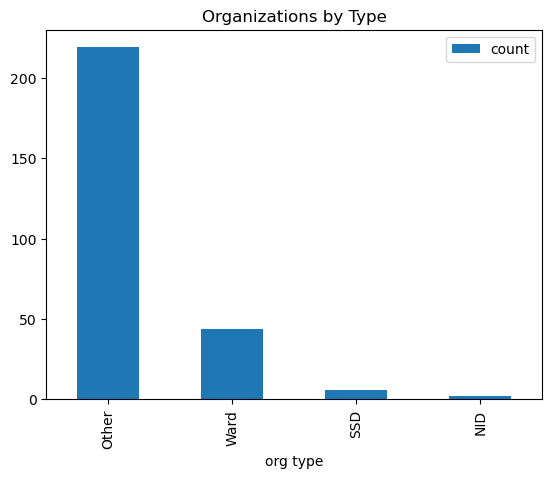

In [68]:
org_type_count.plot.bar(x = 'org type', y = 'count', title = 'Organizations by Type')

Ta-da!
Not super helpful but it's something...

### Trimming the Data
I'd like to have a dataset of just the information that's important to me. Let's take another look at the dataset.

In [78]:
RCO

,OBJECTID,ORGANIZATI,ORGANIZA_1,MEETING_LO,ORG_TYPE,PREFFERED_,PRIMARY_NA,PRIMARY_AD,PRIMARY_EM,PRIMARY_PH,...,ALTERNAT_1,ALTERNAT_2,ALTERNAT_3,A_PHONE_EX,EXPIRATION,EFFECTIVE_,LNI_ID,Shape__Are,Shape__Len,geometry
0,1,Girard Estate Neighbors Association,"PO Box 20116\r\nPhiladelphia, pA 19145","2336 S 18th Street\r\nPhiladelphia, PA 19145",Other,Email,Paul Rossi,"PO Box 20116\r\nPhiladelphia, PA 19145",contact@girardestateneighbors.org,2152874715,...,"2508 S Colorado Street\r\nPhiladelphia, PA 19145",flowershow1997@yahoo.com,2152874716,NaN,2023,2014-03-01,203,1.082550e+06,4463.667453,"POLYGON ((-75.18689 39.91886, -75.18757 39.919..."
1,2,SoLo/Germantown Civic Association,"4908 Wayne Ave, 19144",Southside Church Center 5058 Wayne Ave ...,Other,Email,Allison Weiss,"4908 Wayne Ave, 19144",awfromhh4@gmail.com,2158435555,...,None,\t\tthekeithbrooks@hotmail.com,None,NaN,2023,2014-03-01,321,5.993613e+06,11871.164642,"POLYGON ((-75.16022 40.02130, -75.16059 40.020..."
2,3,Greater Bustleton Civic League,"9823 Verree Rd Philadelphia\r\nPhiladelphia, P...","9823 Verree Rd Philadelphia\r\nPhiladelphia, P...",Other,Email,Jack O'Hara,"9823 Verree Rd\r\nPhiladelphia, PA 19115",jackohara1@aol.com,2156739519,...,"PO BOX 51523\r\nPhiladelphia, PA 19115\r\nUnit...",None,2154648011,NaN,2023,2014-03-01,208,2.061116e+07,23393.554744,"POLYGON ((-75.04837 40.11260, -75.04781 40.112..."
3,4,East Passyunk Crossing Civic Association (EPX),1025 Mifflin Street,1025 Mifflin Street,Other,Email,Samantha Gross,1025 Mifflin Street,Zoning@epcrossing.org,5086854576,...,1025 Mifflin Street,ajsciolla@yahoo.com,2158808514,NaN,2023,2014-03-01,174,1.318087e+06,4734.886361,"POLYGON ((-75.16626 39.93022, -75.16559 39.930..."
4,5,Seventh Street Community Civic Association,"415 Hoffman Street, 19148","631 Snyder Ave., 19148",Other,Email,Bruce Baldwin,"415 Hoffman Street, 19148",baldwinbruce@yahoo.com,2673049161,...,617 Tasker Street 19145,gordanRoland40@gmail.com,2156050187,NaN,2023,2014-03-01,318,6.385849e+05,3214.143491,"POLYGON ((-75.15294 39.92469, -75.15304 39.924..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,269,Price-Knox Neighbors Assn.,"187 West Price Street\r\nPhiladelphia, PA 19144","5800 Knox Street\r\nPhiladelphia, PA 19144",Other,Email,Rev Elliot J Harrigan,"187 West Price Street\r\nPhiladelphia, PA 19144",ejhaxa@gmail.com,2158682047,...,5739 Knox Street,msmuttsy502@hotmail.com,2159390333,NaN,2024,2022-07-18,449,8.662511e+04,1371.700913,"POLYGON ((-75.17922 40.03507, -75.17837 40.034..."
269,270,North Central East RCO,2142 N 12th Street,The Church of the Helping,Other,Email,Shirley Kitchen,2142 N 12th Street,shirleykitchen03@gmail.com,2153003789,...,None,None,None,NaN,2024,2022-07-08,441,1.210542e+06,6708.857603,"POLYGON ((-75.15162 39.97497, -75.15131 39.976..."
270,271,Eastwick United CDC,"8401 Lyons Place\r\nPhiladelphia, PA.","7917 Buist Avenue\r\nPhiladelphia, PA 19153",Other,Email,Theodore Pickett,"7917 Buist Avenue\r\nPhiladelphia, PA",thpickett@comcast.net,2159086713,...,None,vj7912@gmail.com,2152876161,NaN,2024,2022-07-26,450,5.486209e+07,38171.063724,"POLYGON ((-75.25247 39.90678, -75.25193 39.906..."
271,272,ACANA CDC- United Southwest Neighbors,"5530 Chester Avenue\r\nPhiladelphia, PA 19143","5530 Chester Avenue\r\nPhiladelphia, PA 19143",Other,Email,Voffee Jabateh,"5530 Chester Avenue\r\nPhiladelphia, PA 19143",voffeejabateh@acanaus.org,4844320932,...,None,mtrawally@acanaus.org,2159088961,NaN,2024,2022-07-08,431,7.929765e+06,17544.538141,"POLYGON ((-75.23643 39.94265, -75.23573 39.942..."


I'll take the columns: 'ORGANIZATI', 'ORG_TYPE', 'PREFERRED_', 'PRIMARY_NA', 'PRIMARY_AD', 'PRIMARY_EM', 'PRIMARY_PH', 'Shape_Are', 'Shape_Len', and 'geometry'

In [81]:
desired_columns = ['ORGANIZATI', 'ORG_TYPE', 'PREFFERED_', 'PRIMARY_NA', 'PRIMARY_AD', 'PRIMARY_EM', 'PRIMARY_PH', 'Shape__Are', 'Shape__Len', 'geometry']
RCO[desired_columns].sample(5)

,ORGANIZATI,ORG_TYPE,PREFFERED_,PRIMARY_NA,PRIMARY_AD,PRIMARY_EM,PRIMARY_PH,Shape__Are,Shape__Len,geometry
268,Price-Knox Neighbors Assn.,Other,Email,Rev Elliot J Harrigan,"187 West Price Street\r\nPhiladelphia, PA 19144",ejhaxa@gmail.com,2158682047,8.662511e+04,1371.700913,"POLYGON ((-75.17922 40.03507, -75.17837 40.034..."
114,Whitman Council Incorporated,Other,Email,Mark Kapczynski,"2455 S Third Street, Philadelphia PA 19148",whitmancouncilinc@gmail.com,2154684056,1.059193e+07,13677.267764,"POLYGON ((-75.15663 39.92270, -75.15506 39.922..."
7,Fairmount Civic Association,Other,Email,Teresa M Hoberg,"2633 Aspen Street, 19130",Zoning@FairmountCivicAssociation.org,2152366530,1.464067e+06,6075.170187,"POLYGON ((-75.18712 39.97504, -75.18669 39.974..."
29,Callowhill Neighborhood Association,Other,Email,Sarah McEneaney,"1115 Hamilton St., 19123",sarahmceneaney@me.com,2156204647,6.896871e+05,3452.310843,"POLYGON ((-75.15184 39.95994, -75.15186 39.959..."
44,Uptown Entertainment and Development Corporation,Other,Email,Yumy Odom,2227 N. Broad Street Suite 2F \r\nPhiladelphia...,uedc.rco@gmail.com,9083341793,1.556091e+06,5375.446206,"POLYGON ((-75.15406 39.98601, -75.15441 39.984..."


Here's the trimmed dataset! Let's declare it as a variable and rename the columns to make it legible.

In [83]:
RCO_trimmed = RCO[desired_columns].copy()

Again, probably not super useful, but what if I want to see org info for only the people who are the primary contact for multiple orgs:
'Gloria R Kellam', 
'Andrew Gentsch' 
'Shannon Farrell', 
'Philip Grutzmacher'

In [89]:
name_list = ['Gloria R Kellam', 'Andrew Gentsch', 'Shannon Farrell', 'Philip Grutzmacher']
RCO_trimmed[RCO_trimmed['PRIMARY_NA'].isin(name_list)]

,ORGANIZATI,ORG_TYPE,PREFFERED_,PRIMARY_NA,PRIMARY_AD,PRIMARY_EM,PRIMARY_PH,Shape__Are,Shape__Len,geometry
19,35th Democratic Ward,Ward,Email,Philip Grutzmacher,"485 E. Devereaux Avenue Philadelphia, PA 19111",pgrutzmacher@msn.com,2157226694,1.043691e+07,15861.385572,"POLYGON ((-75.08747 40.06359, -75.08707 40.063..."
56,Lawncrest Community Association,Other,Email,Philip Grutzmacher,"485 Devereaux Avenue\r\nPhiladelphia, PA 19111",pgrutzmacher@msn.com,2157226694,4.193270e+06,9636.084668,"POLYGON ((-75.08746 40.04747, -75.08761 40.047..."
84,51st Republican Ward,Ward,Email,Andrew Gentsch,"Box 19820\r\nPhiladelphia, PA 19143",agent3@earthlink.net,(215)729-1090,4.419084e+06,11269.416366,"POLYGON ((-75.22124 39.94817, -75.22088 39.947..."
153,40th Democratic Ward,Ward,Email,Gloria R Kellam,"3025 S. 74th Street\r\nPhiladelphia, Pennsylva...",gloriakellam@verizon.net,2153136723,4.665317e+07,37716.834349,"POLYGON ((-75.20589 39.93542, -75.20567 39.935..."
163,44th Ward Republican,Ward,Email,Andrew Gentsch,"5513 Paschall Ave. \r\nPhiladelphia, PA 19143",agent3@earthlink.net,2157291090,2.996944e+06,7662.328469,"POLYGON ((-75.23013 39.97857, -75.23017 39.978..."
180,Harrowgate Civic Association,Other,Mail,Shannon Farrell,"3640 Emerald Street\r\nPhiladelphia, PA 19134",harrowgatecivicassociation@gmail.com,2676944347,5.773370e+06,9659.645588,"POLYGON ((-75.09289 40.00598, -75.09253 40.005..."
205,"Paschall Betterment League, Inc",Other,Email,Gloria R Kellam,"7132 Greenway Ave\r\nPhiladelphia , PA 19142",greneekellam13@gmail.com,2153136723,2.226227e+07,30498.524606,"POLYGON ((-75.24024 39.94585, -75.21937 39.928..."
242,45th Democratic Ward,Ward,Email,Shannon Farrell,3640 Emerald Street\r\nPhiladelphia PA 19134,shannon45thdw@gmail.com,2676944347,2.130560e+07,20862.927497,"POLYGON ((-75.05929 40.01340, -75.05878 40.012..."


***This will be much more ueful when I later map the orgs and use it to search the values in the vicinity of my project area.***